# Exonerations in the United States

### Glossary

In general, an exoneration occurs when a person who has been convicted of a crime is officially cleared based on new evidence of innocence.

Exoneree—A person who was convicted of a crime and later officially declared innocent of that crime, or relieved of all legal consequences of the conviction because evidence of innocence that was not presented at trial required reconsideration of the case.


#### False Confession (FC)
The exoneree falsely confessed if (1) he or she made a false statement to authorities which was treated as a confession, (2) the authorities claimed that the exoneree made such a statement but the exoneree denied it, or (3) the exoneree made a statement that was not an admission of guilt, but was misinterpreted as such by the authorities.

#### False or Misleading Forensic Evidence (F/MFE)
Exoneree's conviction was based at least in part on forensic information that was (1) caused by errors in forensic testing, (2) based on unreliable or unproven methods, (3) expressed with exaggerated and misleading confidence, or (4) fraudulent.

#### Inadequate Legal Defense (ILD)
The exonoree's lawyer at trial provided obviously and grossly inadequate representation.


#### Mistaken Witness Identification (MWID)
At least one witness mistakenly identified the exoneree as a person the witness saw commit the crime.

#### No Crime (NC)
The exoneree was convicted of a crime that did not occur, either because an accident or a suicide was mistaken for a crime, or because the exoneree was accused of a fabricated crime that never happened.

#### Official Misconduct (OM)
Police, prosecutors, or other government officials significantly abused their authority or the judicial process in a manner that contributed to the exoneree's conviction.

#### Perjury or False Accusation (P/FA)
A person other than the exoneree falsely accused the exoneree of committing the crime for which the exoneree was later exonerated, either in sworn testimony or otherwise.

#### Posthumous exoneration (PH)
An exoneration of a person after that person died, including cases in which a living codefendant was exonerated under circumstances that clearly indicate that the deceased person would have been exonerated if he or she were alive.


In [1253]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
#Setting Seaborn context
sns.set_context("talk", font_scale= 1.2, rc={"lines.linewidth": 5.5})

In [1184]:
df = pd.read_excel('/Users/valeriarozenbaum/Documents/exonerationdata.xlsx')
df.head()

,Last Name,First Name,Age,Race,Sex,State,County,Tags,Worst Crime Display,List Add'l Crimes Recode,Occurred,Convicted,Exonerated,Sentence,DNA,*,FC,MWID,F/MFE,P/FA,OM,ILD,Posting Date
0,Abbitt,Joseph Lamont,31.0,Black,Male,North Carolina,Forsyth,CV,Child Sex Abuse,Sexual Assault;#Kidnapping;#Burglary/Unlawful ...,1991,1995,2009,Life,DNA,NaN,NaN,MWID,NaN,NaN,NaN,NaN,2011-09-01
1,Abdal,Warith Habib,43.0,Black,Male,New York,Erie,NaN,Sexual Assault,Robbery,1982,1983,1999,20 to Life,DNA,NaN,NaN,MWID,F/MFE,NaN,OM,NaN,2011-08-29
2,Abernathy,Christopher,17.0,Caucasian,Male,Illinois,Cook,CIU;#CV;#H,Murder,Rape;#Robbery,1984,1987,2015,Life without parole,DNA,NaN,FC,NaN,NaN,P/FA,OM,NaN,2015-02-13
3,Acero,Longino,35.0,Hispanic,Male,California,Santa Clara,NC;#P,Sex Offender Registration,NaN,1994,1994,2006,2 years and 4 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ILD,2011-08-29
4,Adams,Anthony,26.0,Hispanic,Male,California,Los Angeles,H;#P,Manslaughter,NaN,1996,1996,2001,12 years,NaN,NaN,NaN,NaN,NaN,P/FA,OM,NaN,2012-05-18


In [1185]:
#Renaming columns for easier analysis
df.rename(columns = {'Worst Crime Display': 'Worst_Crime'}, inplace = True)
df.rename(columns = {'F/MFE': 'F_MFE'}, inplace = True)
df.rename(columns = {'P/FA': 'P_FA'}, inplace = True)

In [1186]:
def eda(dataframe): 
    print "missing values \n", dataframe.isnull().sum() 
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape     
    print "dataframe describe \n", dataframe.describe()
    print "dataframe length =", len(dataframe) 
    print "dataframe Worst Crime unique =", dataframe.Worst_Crime.unique()
    print "dataframe State unique =", dataframe.State.unique()
    for item in dataframe:
        print item
        print dataframe[item].nunique()
        
eda(df)

missing values 
Last Name                      0
First Name                     0
Age                            5
Race                           0
Sex                            0
State                          0
County                        40
Tags                         321
Worst_Crime                    0
List Add'l Crimes Recode    1166
Occurred                       0
Convicted                      0
Exonerated                     0
Sentence                       0
DNA                         1581
*                           1930
FC                          1783
MWID                        1426
F_MFE                       1542
P_FA                         882
OM                           989
ILD                         1548
Posting Date                   0
dtype: int64
dataframe types 
Last Name                           object
First Name                          object
Age                                float64
Race                                object
Sex                    

In [1187]:
#Dropping some columns that wont be necessary
#An asterisk (*) in the column to the right of the "DNA" column means that the case is not included in the 
#Innocence Project's list of DNA exonerations because post-conviction DNA evidence was not central to establishing 
#innocence, and other non-DNA factors were essential to the exoneration
del df['*']
del df['Last Name']
del df['First Name']
del df['Posting Date']
del df['County']
del df["List Add'l Crimes Recode"]

In [1188]:
states = ('Wisconsin',
'Connecticut',
'Massachusetts',
'South Dakota',
'North Dakota',
'Minnesota',
'Tennessee',
'Ohio',
'Nevada',
'Missouri',
'Washington',
'Pennsylvania',
'Arizona',
'Alabama',
'New Jersey',
'New Mexico',
'North Carolina',
'Pennsylvania',
'Maryland',
'Hawaii',
'Oregon',
'Oklahoma',
'South Carolina',
'West Virginia', 
'Kansas',
'Arkansas',  
'New Hampshire',
'Puerto Rico', 
'Wyoming',
'Rhode Island', 
'Nebraska',
'Colorado', 
'Alaska',
'Vermont',    
'Idaho') 

In [1189]:
states_df = pd.DataFrame(columns=['Age','Race','Sex','State','Tags','Worst_Crime','Occurred','Convicted','Exonerated','Sentence','DNA','FC','MWID','F_MFE','P_FA','OM','ILD'])  

In [1190]:
states_df['State'] = states

In [1191]:
states_df['Exonerated'] = 2017

In [1192]:
states_df['Age'] = 0

In [1193]:
states_df.isnull = np.nan

In [1194]:
states_df.fillna(0, inplace= True)

In [1195]:
states_df.head()

,Age,Race,Sex,State,Tags,Worst_Crime,Occurred,Convicted,Exonerated,Sentence,DNA,FC,MWID,F_MFE,P_FA,OM,ILD
0,0,0,0,Wisconsin,0,0,0,0,2017,0,0,0,0,0,0,0,0
1,0,0,0,Connecticut,0,0,0,0,2017,0,0,0,0,0,0,0,0
2,0,0,0,Massachusetts,0,0,0,0,2017,0,0,0,0,0,0,0,0
3,0,0,0,South Dakota,0,0,0,0,2017,0,0,0,0,0,0,0,0
4,0,0,0,North Dakota,0,0,0,0,2017,0,0,0,0,0,0,0,0


In [1196]:
df = df.append(states_df)

In [1197]:
#Changing the string values to 1 if value present and 0 if value is NaN
df['DNA'] = df['DNA'].map(lambda x: 1 if x == "DNA" else 0)
df['FC'] = df['FC'].map(lambda x: 1 if x == 'FC' else 0) 
df['MWID'] = df['MWID'].map(lambda x: 1 if x == 'MWID' else 0) 
df['F_MFE'] = df['F_MFE'].map(lambda x: 1 if x == 'F/MFE' else 0) 
df['P_FA'] = df['P_FA'].map(lambda x: 1 if x == 'P/FA' else 0) 
df['ILD'] = df['ILD'].map(lambda x: 1 if x == 'ILD' else 0) 
df['OM'] = df['OM'].map(lambda x: 1 if x == 'OM' else 0) 


In [1198]:
#The states were labeled based on whether on not the exoneree was imprisoned in a state or federal facility. 
#If it was a state facility, the value is just the state. If it was federal the value includes the word 'Fed'
#For the sake of this analysis, I will not be differentiating between facility types and will change the state column
#to just state names to focus primarily on location

df['State'].replace(['Fed-WI'], 'Wisconsin', inplace = True)
df['State'].replace(['Fed-VA'], 'Virginia', inplace = True)
df['State'].replace(['Fed-IL'], 'Illinois', inplace = True)
df['State'].replace(['Fed-CT'], 'Connecticut', inplace = True)
df['State'].replace(['Fed-TX'], 'Texas', inplace = True)
df['State'].replace(['Fed-LA'], 'Louisiana', inplace = True)
df['State'].replace(['Fed-NY'], 'New York', inplace = True)
df['State'].replace(['Fed-MA'], 'Massachusetts', inplace = True)
df['State'].replace(['Fed-SD'], 'South Dakota', inplace = True)
df['State'].replace(['Fed-ND'], 'North Dakota', inplace = True)
df['State'].replace(['Fed-MN'], 'Minnesota', inplace = True)
df['State'].replace(['Fed-MI'], 'Michigan', inplace = True)
df['State'].replace(['Fed-TN'], 'Tennessee', inplace = True)
df['State'].replace(['Fed-CA'], 'California', inplace = True)
df['State'].replace(['Fed-Military'], 'Military', inplace = True)
df['State'].replace(['Fed-OH'], 'Ohio', inplace = True)
df['State'].replace(['Fed-NV'], 'Nevada', inplace = True)
df['State'].replace(['Fed-MO'], 'Missouri', inplace = True)
df['State'].replace(['Fed-WA'], 'Washington', inplace = True)
df['State'].replace(['Fed-PA'], 'Pennsylvania', inplace = True)
df['State'].replace(['Fed-AZ'], 'Arizona', inplace = True)
df['State'].replace(['Fed-MT'], 'Montana', inplace = True)
df['State'].replace(['Fed-FL'], 'Florida', inplace = True)
df['State'].replace(['Fed-KY'], 'Kentucky', inplace = True)
df['State'].replace(['Fed-AL'], 'Alabama', inplace = True)
df['State'].replace(['Fed-NJ'], 'New Jersey', inplace = True)
df['State'].replace(['Fed-NM'], 'New Mexico', inplace = True)
df['State'].replace(['Fed-DC'], 'District of Columbia', inplace = True)


In [1199]:
#Removing NaN values from tags and filling them with 0s
#Stripping special characters from the column and separating values by comma

df['Tags'].fillna(0, inplace= True)
df['Tags'].replace(regex=True,inplace=True,to_replace='\#',value='')
df['Tags'].replace(regex=True,inplace=True,to_replace='\;',value=',')
df['Tags'].isnull().sum()

0

In [1201]:
#Creating new columns for:
# Posthumous exoneration - PH
# No Crime - NC

df['PH'] = df['Tags'].str.contains('PH')
df['NC'] = df['Tags'].str.contains('NC')

df['PH'].fillna(0, inplace= True)
df['NC'].fillna(0, inplace= True)

df['PH'] = df['PH'].astype(int)
df['NC'] = df['NC'].astype(int)

In [1202]:
df['Murder'] = df['Worst_Crime'].str.contains('Murder')
df['Sexual_Assault'] = df['Worst_Crime'].str.contains('Sexual Assault')
df['Drug_Possession_Sale'] = df['Worst_Crime'].str.contains('Drug Possession or Sale')
df['Child_Sex_Abuse'] = df['Worst_Crime'].str.contains('Child Sex Abuse')
df['Robbery'] = df['Worst_Crime'].str.contains('Robbery')

df['Murder'].fillna(0, inplace= True)
df['Sexual_Assault'].fillna(0, inplace= True)
df['Drug_Possession_Sale'].fillna(0, inplace= True)
df['Child_Sex_Abuse'].fillna(0, inplace= True)
df['Robbery'].fillna(0, inplace= True)

df['Murder'] = df['Murder'].astype(int)
df['Sexual_Assault'] = df['Sexual_Assault'].astype(int)
df['Drug_Possession_Sale'] = df['Drug_Possession_Sale'].astype(int)
df['Child_Sex_Abuse'] = df['Child_Sex_Abuse'].astype(int)
df['Robbery'] = df['Robbery'].astype(int)

In [1203]:
#Creating function that returns the difference for 2 values and applying it to the Convicted and Exonerated columns
#to get the time served.
#Taking the time served and creating a new column

def dif(x,y):
    return y-x

df['Served'] = df.apply(lambda row: dif(row['Convicted'], row['Exonerated']), axis=1)

In [1204]:
df['Served'].replace(regex=True,inplace=True,to_replace= 2017, value= 0)

In [1205]:
dummies = pd.get_dummies(df['Race'])
df= pd.concat([df,dummies], axis=1)

In [1206]:
#This will create a new column that sums up the totals per year
#Since there are no missing values in the Race column, it will add a 1 to the total to signify
#an individual exoneration.
#If the race column contains a 0 - it will add a 0 to the Total column
#This is done to avoid manufacturing false totals for the states previously added to the df

df['Total'] = [0 if x == 0 else 1 for x in df['Race']]

In [1207]:
df.index = df.Exonerated
df.index = pd.to_datetime(df.index, format='%Y')
df.drop('Exonerated', axis=1, inplace=True)

In [1208]:
df_year_state = df.groupby([pd.TimeGrouper('A'), 'State']).sum()

In [1209]:
df_year_state['Average_Age'] = np.where(df_year_state['Age'] > 1, df_year_state['Age'], df_year_state['Age']/df_year_state['Total'])

In [1210]:
df_year_state['Average_Age'] = df_year_state["Age"] / df_year_state["Total"]

In [1211]:
df_year_state['Average_Age'].fillna(0, inplace=True)

In [1212]:
#Creating a column for the percentage of white exonerees per year per state
df_year_state['Percent_White'] = df_year_state['Caucasian']/df_year_state['Total']

In [1213]:
#Creating a column for the percentage of non white exonerees per year + per state
df_year_state['Percent_NonWhite'] = 1.0 - df_year_state['Percent_White']

In [1214]:
#Since the states added for 2017 have a 0 for race, the above functions will create NaNs
#Below, I'm converting the NaNs to 0
df_year_state.isnull = np.nan
df_year_state.fillna(0, inplace= True)

In [1215]:
df_year_state.drop(['Age','Occurred','Convicted'], axis=1, inplace=True)


In [21]:
#df.to_csv('Exoneration_Clean.csv', index=False)

## EDA

In [1245]:
df.Total.sum()

2025

In [1246]:
df.Served.sum()

21265

In [1252]:
df.Served.mean()

10.322815533980583

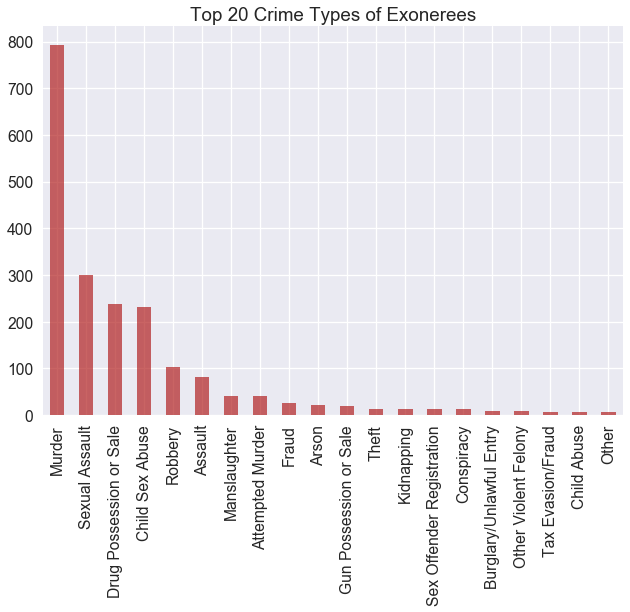

In [21]:
df.Worst_Crime.value_counts().head(20).plot(kind='bar', color='firebrick', alpha=.7, title='Top 20 Crime Types of Exonerees')

#Below are the 20 most frequent crime types that were exononerated

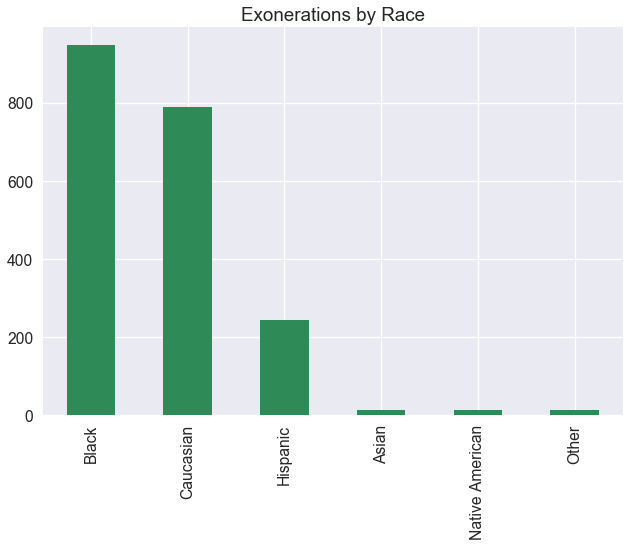

In [85]:
df.Race.value_counts().plot(kind='bar', color='#2E8B57', title='Exonerations by Race')

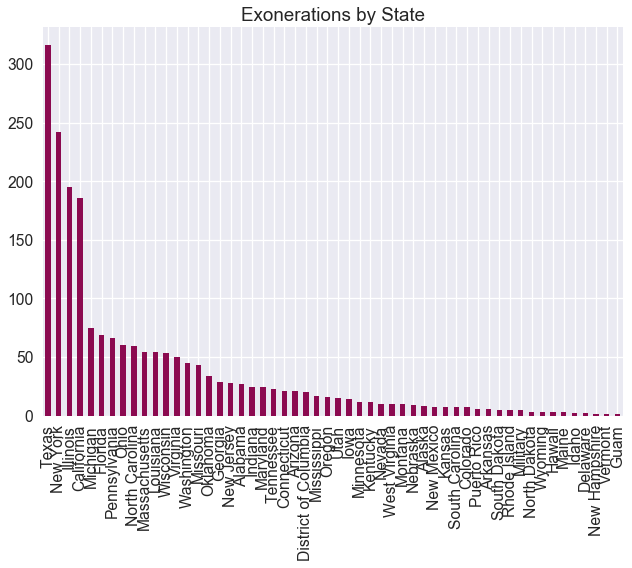

In [87]:
#It looks like Texas has the highest numbers of exonerations since 1989 
#I'm sure that the state's overall large prison population has something to do with this
#In 2015, the prison population was 157,251(not including jails) and incarcertation rate was
#568 per 100k.

#In 2015, New York had a prison population of 51,606(not including jails) and an incarceration
#rate of 260 per 100k.

#Illionois is third on the list and has a prison population of 46,240 in 2015 and incarceration 
#rate of 360 per 100k.

#This is interesting as Louisiana has the incarceration rate in the US(776 per 100k) 
#but doesn't make the top 10 for exonerations

#source: http://www.sentencingproject.org/the-facts/#map?dataset-option=SIR

df.State.value_counts().plot(kind='bar', color='#8B0A50', title='Exonerations by State')

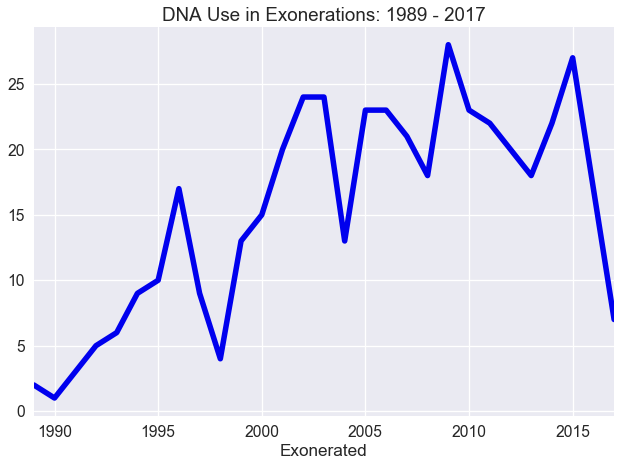

In [90]:
#This is the yearly trend of DNA use in exonerations
df.groupby('Exonerated').DNA.sum().plot(kind='line', color='#0000EE', title='DNA Use in Exonerations: 1989 - 2017')

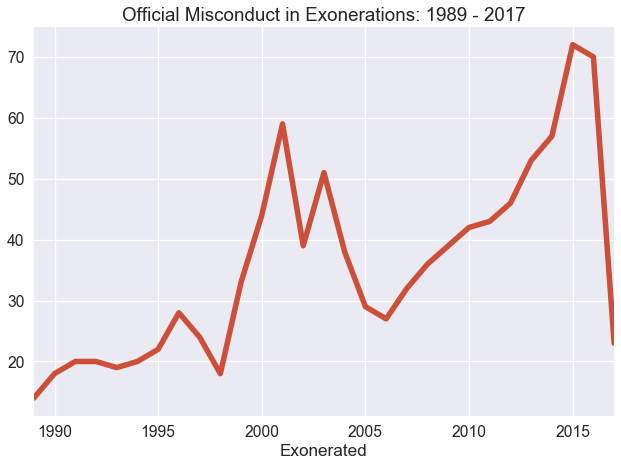

In [93]:
#Here we are looking at the yearly trend of exonerations where official misconduct occurred

df.groupby('Exonerated').OM.sum().plot(kind='line', color='#CD4F39', title='Official Misconduct in Exonerations: 1989 - 2017')

### Exonerations by Age

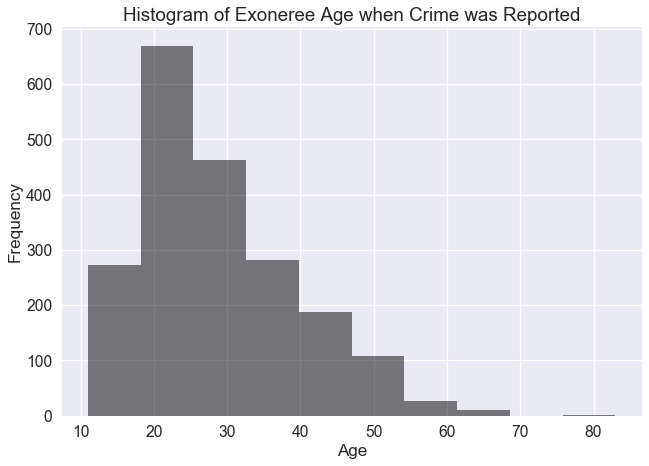

In [22]:
df.Age.plot(kind='hist', color='black', alpha=.5 ,title='Histogram of Exoneree Age when Crime was Reported')
plt.xlabel('Age')
plt.ylabel('Frequency')

#Below is the distribution of the age the exonerees on the date the crime was reported 
#It looks like the majority of the the crimes were reported when the individuals were in their 20s.
#Suprisingly, there seems to be a larger than expected number of people with crimes reported before the age of 18

In [986]:
under18 = df[df.Age<18] #Creating a separate dataframe to look at exonerations for crimes reported when the individuals
                        #were under 18 years old

under18.Age.value_counts().sum() #It looks like there are 215 cases out of 2,025

215

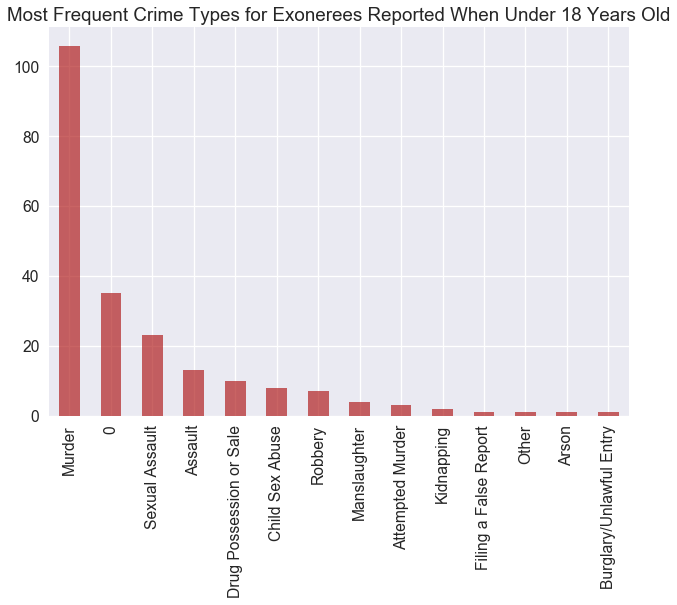

In [987]:
under18.Worst_Crime.value_counts().plot(kind='bar', alpha=.7,color='firebrick', title='Most Frequent Crime Types for Exonerees Reported When Under 18 Years Old')

## Violent  Crime Control and Law Enforcement Act of 1994

In 1994, President Bill Clinton signed the Violent Crime Control and Law Enforcement Act of 1994.
Among its many provisions, it implemented the "three strikes" mandatory life sentence for repeat offenders, money to hire new police officers, funding for prisons, and an expansion of death penalty eligible offences.The bill lead to an increase in incarcerations, which disproportionately affected the black community. 

Sources:

https://www.ncjrs.gov/txtfiles/billfs.txt


http://www.factcheck.org/2016/04/bill-clinton-and-the-1994-crime-bill/ 

In [98]:
df_94 = df[df.Exonerated <1994] #Taking all exonerations before 1994 and created new df

In [120]:
df_94.Total.sum() #It looks like there were 160 exonerations

160

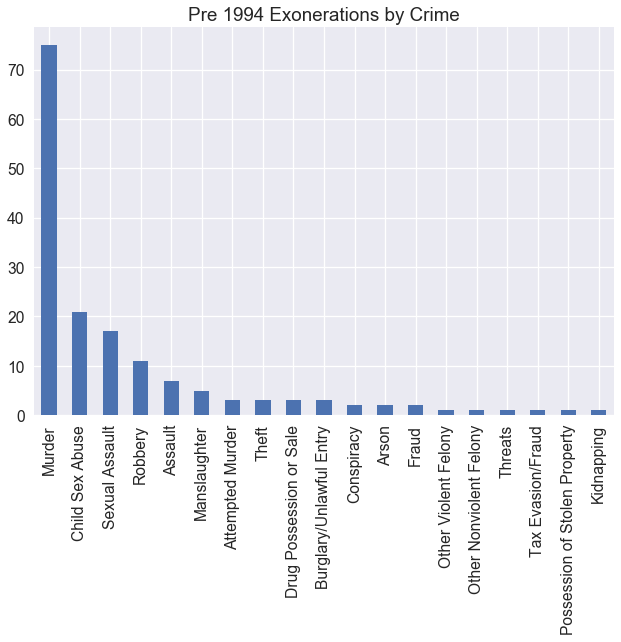

In [122]:
#Murder still seems to be the most frequently exonerated crime

df_94.Worst_Crime.value_counts().plot(kind='bar', title='Pre 1994 Exonerations by Crime')

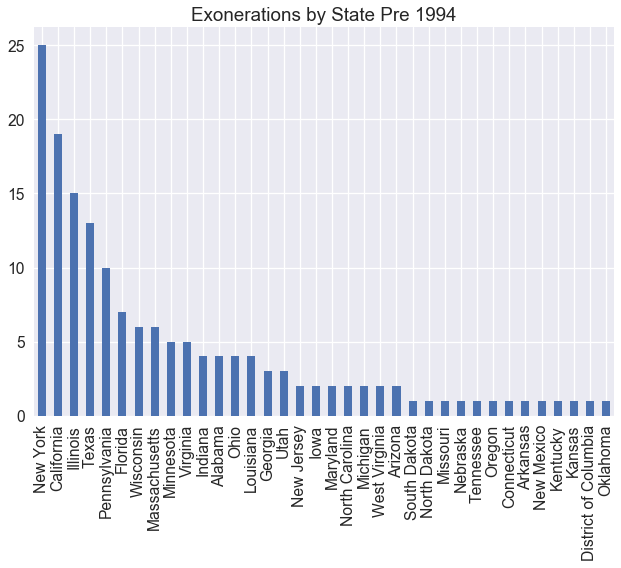

In [101]:
df_94.State.value_counts().plot(kind='bar', title='Exonerations by State Pre 1994')

In [121]:
df_94.Served.mean() #The average sentence was 6.15 years

6.15625

### Pre 1994 - Black Exonerees

In [45]:
df_94b = df_94[df_94.Race == 'Black'] 

In [48]:
df_94b.Total.sum() #Out of the total 160 exonerations, 53 were black

53

In [46]:
df_94b.Served.mean() # The average sentence of a black exoneree was 6.69 years

6.69811320754717

### Pre 1994 - White Exonerees

In [58]:
df_94w = df_94[df_94.Race == 'Caucasian']

In [60]:
df_94w.Total.sum() #86 of the exonerees were white

86

In [61]:
df_94w.Served.mean() # The average sentence of a white exoneree was 5.73 years

5.732558139534884

### Post 1994 Exonerations

In [140]:
df_post94 = df[df.Exonerated >= 1994] 

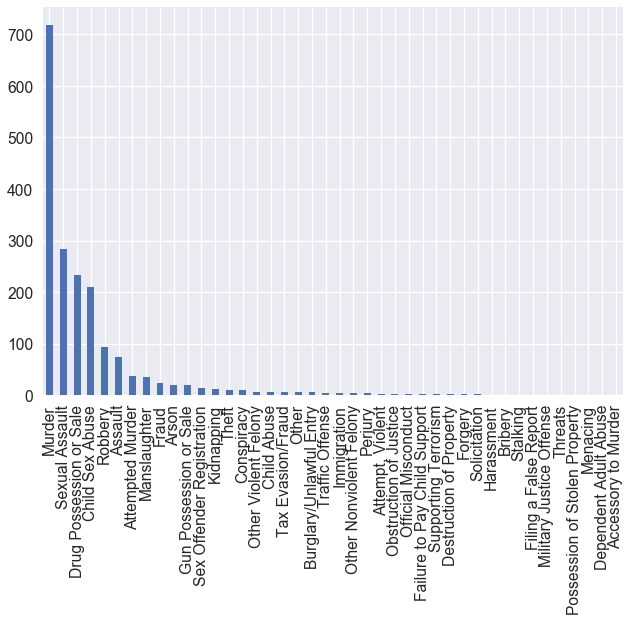

In [141]:
#While murder is still the most commonly exonerated crime, there are differences in the rankings
#of the other types.
#For one, we see the frequency of child sex abuse exonerations fall behind sexual assault 
#and drug possession/sale
#Pre 1994, drug possession/sale ranked 9th but post 1994 it is the third most commonly
#exonerated crime

df_post94.Worst_Crime.value_counts().plot(kind='bar')

In [142]:
df_post94.Total.sum() #There are at total of 1865 exonerations

1865

In [143]:
df_post94.Served.mean() #The average sentence is 10.87 years

10.873994638069705

### Post 1994 - White Exonerees

In [144]:
df_post94w = df_post94[df_post94.Race == 'Caucasian']

In [145]:
df_post94w.Total.sum() #White exonerees make up a total of 705 of the 1865 exonerations

705

In [146]:
df_post94w.Served.mean() #The average sentence is 9.49 years

9.492198581560285

### Post 1994 - Black Exonerees

In [147]:
df_post94b = df_post94[df_post94.Race == 'Black']

In [148]:
df_post94b.Total.sum() #The number of black exonerees has risen to 895 out of 1865

895

In [149]:
df_post94b.Served.mean() #The average sentence for a black exoneree is 12.72 years

12.724022346368715

## Bayesian Inference

I am interested in seeing whether there is a statistically meaningful difference between black 
and white exonerees convicted of murder. For this, I will set my prior to be murder exonerations in the United States before 1994.

In [150]:
df_prior = df_94[df_94.Worst_Crime == 'Murder'].groupby(['Exonerated']).Worst_Crime.count().values

In [151]:
df_prior_mean = df_prior.mean()
print df_prior_mean

15.0


In [152]:
df_prior_std = df_prior.std()
print df_prior_std

3.52136337233


In [153]:
mean_prior_mean = df_prior_mean
mean_prior_std = df_prior_std

### Population of Interest #1 - Black Exonerations for Murder Post 1994

In [154]:
post94_murderb = df_post94b[df_post94b.Worst_Crime == 'Murder'].groupby(['Exonerated']).Worst_Crime.count().values 

In [155]:
post94_murderb_mean = post94_murderb.mean()
print post94_murderb_mean

15.2916666667


In [156]:
post94_murderb_std = post94_murderb.std()
print post94_murderb_std

8.08021847202


### Population of Interest #2 - White Exonerations for Murder Post 1994

In [157]:
post94_murderw = df_post94w[df_post94w.Worst_Crime == 'Murder'].groupby(['Exonerated']).Worst_Crime.count().values 

In [158]:
post94_murderw_mean = post94_murderw.mean()
print post94_murderw_mean

10.5833333333


In [159]:
post94_murderw_std = post94_murderw.std()
print post94_murderw_std

4.4992283289


### Modeling

In [164]:
import pymc3 as pm
import pydot

In [160]:
with pm.Model() as model:
    
    post94_murderb_mean = pm.Normal('Post_94_Murder_Black_Mean', mean_prior_mean, sd=mean_prior_std)
    post94_murderw_mean = pm.Normal('Post_94_Murder_White_Mean', mean_prior_mean, sd=mean_prior_std)

In [161]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    post94_murderb_std = pm.Uniform('Post_94_Murder_Black_Std', lower=std_prior_lower, upper=std_prior_upper)
    post94_murderw_std = pm.Uniform('Post_94_Murder_White_Std', lower=std_prior_lower, upper=std_prior_upper)

In [162]:
with model:

    groupBlack = pm.Normal('Post_94_Murder_Black', mu= post94_murderb_mean, sd=post94_murderb_std, observed=post94_murderb)
    groupWhite = pm.Normal('Post_94_Murder_White', mu=post94_murderw_mean, sd=post94_murderw_std, observed=post94_murderw)

In [166]:
with model:

    diff_of_means = pm.Deterministic('Diff of Means',post94_murderb_mean - post94_murderw_mean)
    diff_of_stds = pm.Deterministic('Diff of Stds',post94_murderb_std - post94_murderw_std)
    effect_size = pm.Deterministic('Effect Size',
                                   diff_of_means / np.sqrt((post94_murderb_std**2 + post94_murderw_std**2) / 2))

In [167]:
with model:
    trace = pm.sample(20000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -164.89: 100%|██████████| 200000/200000 [00:26<00:00, 7610.67it/s]
Finished [100%]: Average ELBO = -164.92
100%|██████████| 20000/20000 [02:39<00:00, 125.72it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1273a5850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x127657bd0>], dtype=object)

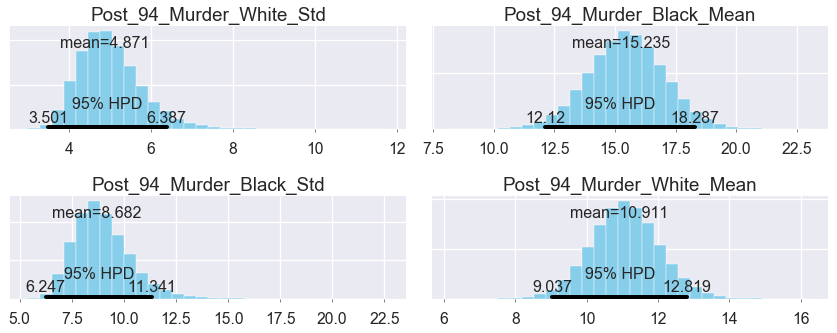

In [168]:
pm.plot_posterior(trace[3000:],
                  varnames=['Post_94_Murder_Black_Mean', 'Post_94_Murder_White_Mean', 'Post_94_Murder_Black_Std', 'Post_94_Murder_White_Std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x125e70e90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x126664f50>], dtype=object)

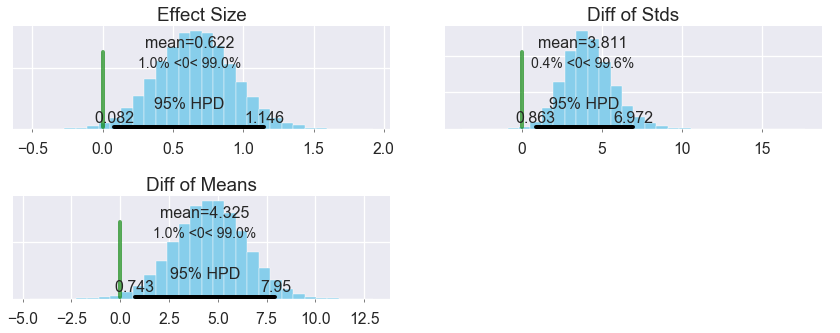

In [169]:
pm.plot_posterior(trace[3000:],
                  varnames=['Diff of Means', 'Diff of Stds', 'Effect Size'],
                  ref_val=0,
                  color='#87ceeb')

In [170]:
pm.summary(trace[3000:],
           varnames=['Diff of Means', 'Diff of Stds', 'Effect Size'])


Diff of Means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  4.325            1.836            0.008            [0.743, 7.950]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.718          3.101          4.330          5.548          7.926


Diff of Stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3.811            1.553            0.006            [0.863, 6.972]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.013          2.771          3.714          4.747          7.169


Effect Size:

  Mean             SD               MC Error         95% HPD interval
  ----

### Death Penalty Sentences

In [1127]:
df_death = df[df['Sentence'] == 'Death']

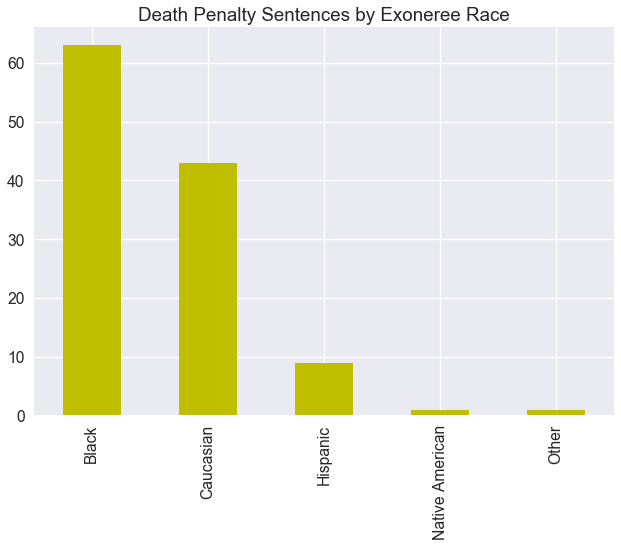

In [1132]:
#The majority of individuals exonerated who were given the death penalty were black
df_death.Race.value_counts().plot(color='y',kind='bar', title='Death Penalty Sentences by Exoneree Race')

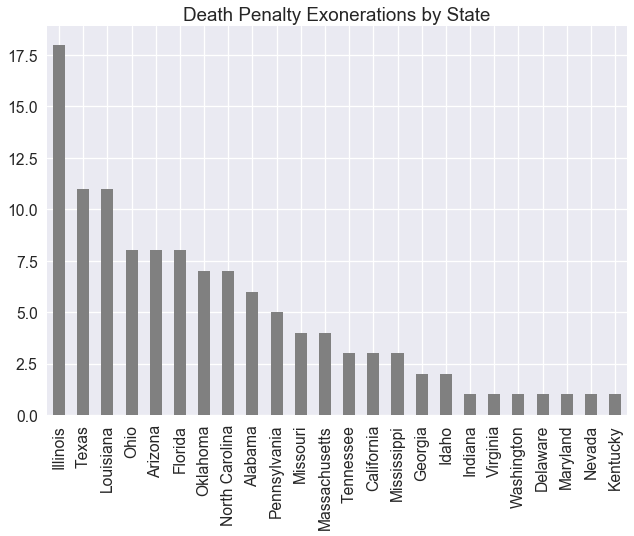

In [1130]:
#The majority of exonerees that received the death penalty were from Illinois, Texas and 
#Louisiana 
df_death.State.value_counts().plot(kind='bar', color='gray', title='Death Penalty Exonerations by State')

In [104]:
# 117 people were given the death penalty 
df_death.Total.count() 

117

In [38]:
# Out of 117 cases, 92 exonerations were based in part on official misconduct
df_death.OM.sum()

92

In [39]:
# 33 cases were exonerated based in part on false or misleading evidence
df_death.F_MFE.sum()

33

In [40]:
# 21 cases convicted based on a false confession
df_death.FC.sum()

21

In [41]:
df_death.NC.sum() #In 5 cases it was found that no crime was actually committed

5

In [101]:
df_death.PH.sum() # 3 cases were exonerated posthumously

3

In [107]:
df_death.Served.mean() #The average exoneree served 14.51 years

14.512820512820513

## Predicting Exonerations for 2017 by State: Panel Regression

In [1216]:
from pandas.stats.plm import PanelOLS

In [1217]:
df_year_state.head() #Bringing Previously created dataframe

DNA  FC  MWID  F_MFE  P_FA  OM  ILD  PH  NC  Murder  \
Exonerated State                                                              
1989-12-31 Arkansas       0   0     1      0     0   1    0   0   0       1   
           Connecticut    0   1     0      0     0   1    1   0   0       1   
           Florida        0   0     1      0     1   2    0   0   0       2   
           Georgia        0   0     0      0     1   1    1   0   1       1   
           Illinois       1   1     3      1     4   2    1   0   1       3   

                        Sexual_Assault  Drug_Possession_Sale  Child_Sex_Abuse  \
Exonerated State                                                                
1989-12-31 Arkansas                  0                     0                0   
           Connecticut               0                     0                0   
           Florida                   0                     0                0   
           Georgia                   0                     0                0   
           Illinois                  1                     0                0   

                        Robbery  Served  0  Asian  Black  Caucasian  Hispanic  \
Exonerated State                                                                
1989-12-31 Arkansas           0       6  0      0      0          1         0   
           Connecticut        0      16  0      0      0          1         0   
           Florida            0      23  0      0      1          1         0   
           Georgia            0       7  0      0      0          1         0   
           Illinois           0      31  0      0      4          2         0   

                        Native American  Other  Total  Average_Age  \
Exonerated State                                                     
1989-12-31 Arkansas                   0      0      1    20.000000   
           Connecticut                0      0      1    42.000000   
           Florida                    0      0      2    24.500000   
           Georgia                    0      0      1    50.000000   
           Illinois                   0      0      6    27.166667   

                        Percent_White  Percent_NonWhite  
Exonerated State                                         
1989-12-31 Arkansas          1.000000          0.000000  
           Connecticut       1.000000          0.000000  
           Florida           0.500000          0.500000  
           Georgia           1.000000          0.000000  
           Illinois          0.333333          0.666667

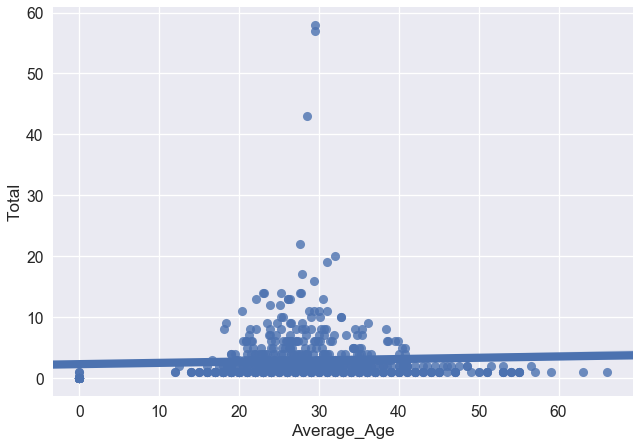

In [1218]:
sns.regplot(x="Average_Age", y="Total", data=df_year_state)

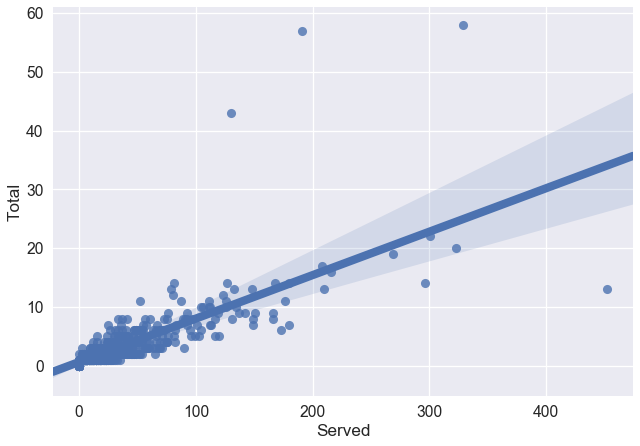

In [1219]:
sns.regplot(x="Served", y="Total", data=df_year_state)

In [1220]:
train = df_year_state.ix['1989-12-31' : '2010-12-31']
test = df_year_state.ix['2011-12-31':'2017-12-31']

In [1221]:
train.head(3)

DNA  FC  MWID  F_MFE  P_FA  OM  ILD  PH  NC  Murder  \
Exonerated State                                                              
1989-12-31 Arkansas       0   0     1      0     0   1    0   0   0       1   
           Connecticut    0   1     0      0     0   1    1   0   0       1   
           Florida        0   0     1      0     1   2    0   0   0       2   

                        Sexual_Assault  Drug_Possession_Sale  Child_Sex_Abuse  \
Exonerated State                                                                
1989-12-31 Arkansas                  0                     0                0   
           Connecticut               0                     0                0   
           Florida                   0                     0                0   

                        Robbery  Served  0  Asian  Black  Caucasian  Hispanic  \
Exonerated State                                                                
1989-12-31 Arkansas           0       6  0      0      0          1         0   
           Connecticut        0      16  0      0      0          1         0   
           Florida            0      23  0      0      1          1         0   

                        Native American  Other  Total  Average_Age  \
Exonerated State                                                     
1989-12-31 Arkansas                   0      0      1         20.0   
           Connecticut                0      0      1         42.0   
           Florida                    0      0      2         24.5   

                        Percent_White  Percent_NonWhite  
Exonerated State                                         
1989-12-31 Arkansas               1.0               0.0  
           Connecticut            1.0               0.0  
           Florida                0.5               0.5

In [1222]:
test.head(3)

DNA  FC  MWID  F_MFE  P_FA  OM  ILD  PH  NC  \
Exonerated State                                                               
2011-12-31 Alabama                 0   0     0      0     1   1    1   0   0   
           California              0   1     1      1     4   4    2   0   1   
           District of Columbia    0   0     0      0     1   1    0   0   0   

                                 Murder  Sexual_Assault  Drug_Possession_Sale  \
Exonerated State                                                                
2011-12-31 Alabama                    0               0                     0   
           California                 4               0                     0   
           District of Columbia       1               0                     0   

                                 Child_Sex_Abuse  Robbery  Served  0  Asian  \
Exonerated State                                                              
2011-12-31 Alabama                             1        0       4  0      0   
           California                          1        0      82  0      0   
           District of Columbia                0        0       5  0      0   

                                 Black  Caucasian  Hispanic  Native American  \
Exonerated State                                                               
2011-12-31 Alabama                   1          0         0                0   
           California                3          1         2                0   
           District of Columbia      1          0         0                0   

                                 Other  Total  Average_Age  Percent_White  \
Exonerated State                                                            
2011-12-31 Alabama                   0      1         35.0       0.000000   
           California                0      6         21.5       0.166667   
           District of Columbia      0      1         17.0       0.000000   

                                 Percent_NonWhite  
Exonerated State                                   
2011-12-31 Alabama                       1.000000  
           California                    0.833333  
           District of Columbia          1.000000

In [1223]:

reg = PanelOLS(y=train['Total'],x=train[['Served','Average_Age']],time_effects=True)



In [1224]:
print reg


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Served> + <Average_Age>

Number of Observations:         478
Number of Degrees of Freedom:   24

R-squared:         0.7245
Adj R-squared:     0.7105

Rmse:              1.2736

F-stat (2, 454):    51.9007, p-value:     0.0000

Degrees of Freedom: model 23, resid 454

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        Served     0.0711     0.0021      34.43     0.0000     0.0671     0.0752
   Average_Age     0.0115     0.0069       1.66     0.0986    -0.0021     0.0250
---------------------------------End of Summary---------------------------------



In [1225]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [1226]:
md = smf.mixedlm("Total ~ Served + Average_Age", train, groups=train.index)
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Total    
No. Observations: 478     Method:             REML     
No. Groups:       478     Scale:              0.8337   
Min. group size:  1       Likelihood:         -810.2438
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.480    0.221  2.169 0.030  0.046  0.914
Served        0.068    0.002 34.645 0.000  0.064  0.072
Average_Age   0.013    0.007  1.902 0.057 -0.000  0.027
groups RE     0.834                                    



/Users/valeriarozenbaum/anaconda/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2039: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [1227]:
X = test[['Served','Average_Age']]
predictions = mdf.predict(X).astype(int)

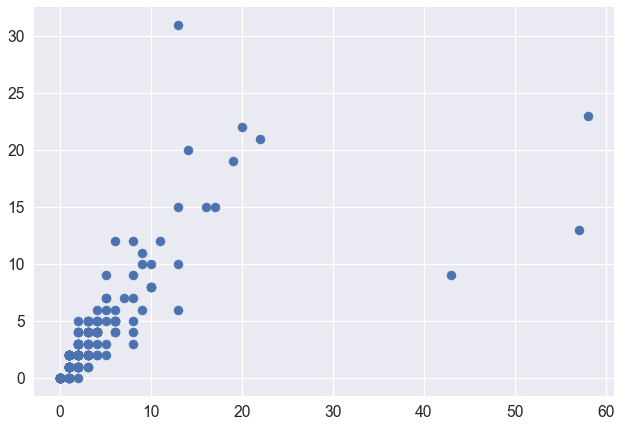

In [1228]:
plt.scatter(test['Total'],predictions)

In [1229]:
print(predictions).sum()

717


In [1230]:
pred = pd.DataFrame(predictions)

In [1231]:
pred.reset_index(inplace=True)

In [1232]:
pred.head()

,Exonerated,State,0
0,2011-12-31,Alabama,1
1,2011-12-31,California,6
2,2011-12-31,District of Columbia,1
3,2011-12-31,Florida,2
4,2011-12-31,Georgia,1


In [1233]:
pred17 = pred[pred.Exonerated == '2017-12-31']

In [1243]:
pred17.tail(37)

,Exonerated,State,0
193,2017-12-31,Iowa,0
194,2017-12-31,Kansas,0
195,2017-12-31,Kentucky,2
196,2017-12-31,Louisiana,2
197,2017-12-31,Maine,1
198,2017-12-31,Maryland,0
199,2017-12-31,Massachusetts,0
200,2017-12-31,Michigan,4
201,2017-12-31,Minnesota,0
202,2017-12-31,Mississippi,1


In [1254]:
pred.to_csv('predictions.csv')

## Multiple Linear Regression

In [1244]:
from scipy import stats, integrate
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [1236]:
X = df_year_state[['Served', 'Average_Age']]  
y = df_year_state['Total'] 
X = sm.add_constant(X)

In [1237]:
_X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [1238]:
model = sm.OLS(y, X).fit() #sm.OLS(output,input)
predictions = model.predict(X)

#Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     484.2
Date:                Tue, 23 May 2017   Prob (F-statistic):          4.70e-133
Time:                        17:41:15   Log-Likelihood:                -1743.5
No. Observations:                 708   AIC:                             3493.
Df Residuals:                     705   BIC:                             3507.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0667      0.309     -0.216      0.829      -0.674       0.541
Served          0.0739      0.002     31.049      0.000       0.069       0.079
Average_Age     0.0254      0.010      2.520      0.012       0.006       0.045
==============================================================================
Omnibus:                     1069.775   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           442364.929
Skew:                           8.419   Prob(JB):                         0.00
Kurtosis:                     124.293   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1239]:
predictions

Exonerated  State               
1989-12-31  Arkansas                0.883946
            Connecticut             2.181059
            Florida                 2.254949
            Georgia                 1.718451
            Illinois                2.914045
            Minnesota               0.943133
            New Jersey              1.388871
            New York                1.240967
            North Carolina          0.793140
            Texas                   2.221193
            Virginia                1.141710
            Wisconsin               0.689610
1990-12-31  Alabama                 0.615674
            California              1.686737
            District of Columbia    0.488912
            Florida                 0.414976
            Illinois                1.629671
            Massachusetts           2.808411
            New York                4.156182
            Ohio                    1.805016
            Pennsylvania            2.229643
            South Dako

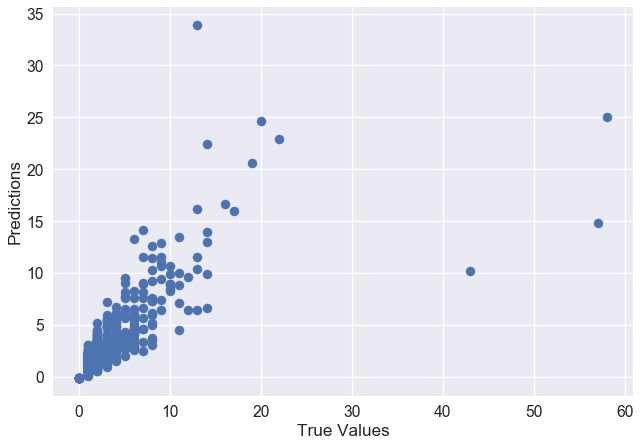

In [1240]:
plt.scatter(y, predictions) #plot the actual values against the predicted values
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()